In [1]:
% pylab inline
% load_ext autoreload
% autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import Zbox as zb
import rstoolbox as rb
# Dataframe display
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Baseline / Reference

In [3]:
baselinefile = "baseline.out/silent_combined.gz"

In [4]:
definitions = {"scores": "*", "sequence" : "B"}
dfb = rb.io.parse_rosetta_file(baselinefile, definitions)

In [5]:
refseq = zb.pdb_to_sequence("../in/5vw1.pdb", chain="B")

In [6]:
refseq

'SMNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISESENESIVEKFISAFKNGWNQEYEDEEEFYNDMQTITLKSE'

In [7]:
print("reference scores ...")
ddg_baseline = np.average(dfb["ddg"])
ddg_sasa_baseline = np.average(dfb["dG_separated/dSASAx100"])
print("ddg average: {}\nddg-sasa average: {}\nscore average: {}".format(np.average(dfb["ddg"]), np.average(dfb["dG_separated/dSASAx100"]), np.average(dfb["score"])))
dfb[["score", "ddg", "dG_separated", "dG_separated/dSASAx100", "sasa", "dSASA_hphobic", "delta_unsatHbonds"]]

reference scores ...
ddg average: -119.7172
ddg-sasa average: -0.8400000000000001
score average: -1379.881


,score,ddg,dG_separated,dG_separated/dSASAx100,sasa,dSASA_hphobic,delta_unsatHbonds
0,-1379.881,-119.960,-96.908,-0.84,76313.281,4582.325,111.0
1,-1379.881,-119.978,-96.908,-0.84,76313.281,4582.325,111.0
2,-1379.881,-119.229,-96.908,-0.84,76313.281,4582.325,111.0
3,-1379.881,-119.459,-96.908,-0.84,76313.281,4582.325,111.0
4,-1379.881,-119.960,-96.908,-0.84,76313.281,4582.325,111.0


In [8]:
#dfb.to_csv("crisprcas9_mini_baseline_scores.csv")

# Minimize, Automat

 ### Files

In [9]:
silentfile = "automat.out/automat.minisilent.gz"

### Load

In [10]:
definitions = {"scores": "*", "sequence" : "B"}
dfs = rb.io.parse_rosetta_file(silentfile, definitions)

### Design analysis

In [11]:
dfs.add_reference_sequence("B", refseq)
dfs = dfs.identify_mutants("B")

In [12]:
dfs_mini = dfs[["description", "score", "ddg", 
                "dG_separated", "dG_separated/dSASAx100", "sasa", "packstat",
                "dSASA_hphobic", "delta_unsatHbonds", 
                "mutant_count_B", "mutants_B", "mutant_positions_B"]]

In [13]:
hotspots = sort(zb.identify_mutant_positions( dfs["mutant_positions_B"] ))

In [14]:
hotspots

array([17, 19, 20, 21, 23, 27, 29, 34, 38, 45, 46, 47, 49, 50, 65, 67])

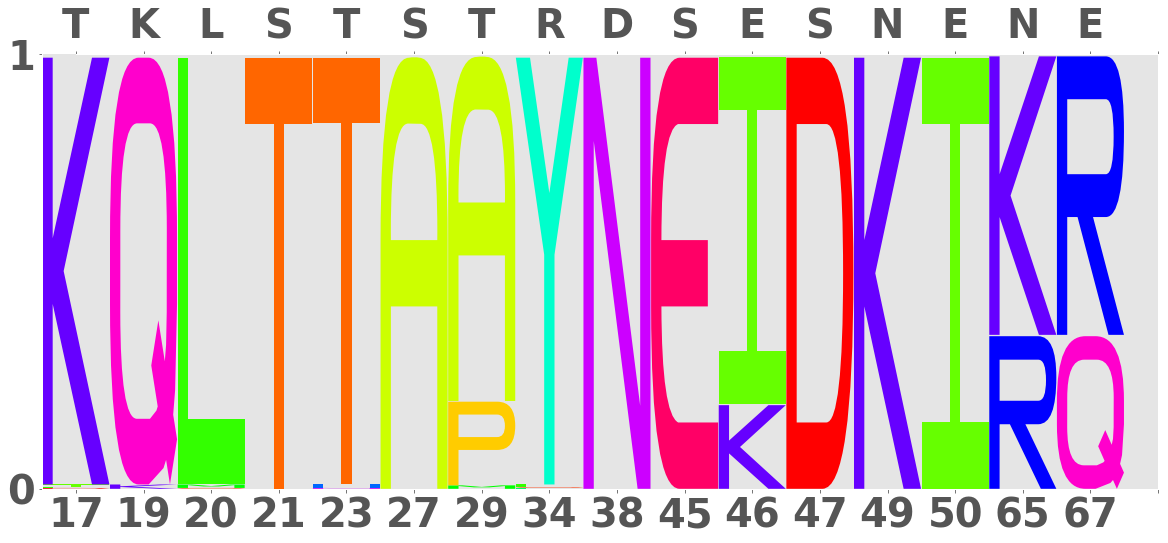

In [15]:
# Frequency logo
fig, ax = rb.plot.logo_plot(dfs, 
                            "B",
                            refseq = refseq,
                            key_residues = hotspots,
                            font_size = 40,
                            )
fig.set_size_inches(20, 8)

#plt.savefig("freqlogo_min_ddg.jpg", dpi=200, format="jpg", bbox_inches="tight")
plt.show()

/Users/hartevel/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


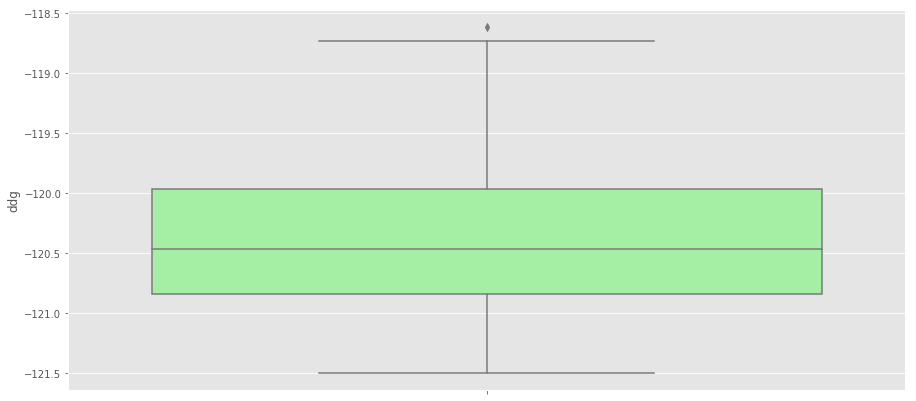

In [16]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = dfs["ddg"], orient="v", color="palegreen")

#plt.savefig("boxp_mini_ddg.jpg", dpi=200, format="jpg", bbox_inches="tight")
plt.show()

### ddG

In [17]:
df = dfs_mini.sort_values("ddg").drop_duplicates(subset="mutants_B").head(10)

In [18]:
#df.to_csv("crisprcas9_mini_ddg_scores.csv")

In [19]:
#rb.io.make_structures( df, outdir="topDdg" )

In [20]:
n = -1
for desc, muts in zip(df["description"], df["mutant_positions_B"]):
    #print(zb.identify_mutant_positions(muts))
    muts = ",".join([str(int(i)+n) for i in muts.split(",")])
    string = zb.print_pymol_mutant_selection("mut"+str(desc), muts, chain="B")
    print(string)

select mut5vw1_0006_2, resi 16+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0033_2, resi 16+18+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0058_2, resi 16+18+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0014, resi 16+18+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0032_2, resi 16+18+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0076_3, resi 16+18+19+20+22+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0047_2, resi 16+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0079_3, resi 16+18+19+20+22+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0006_3, resi 16+20+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
select mut5vw1_0073, resi 16+18+19+20+22+26+28+33+37+44+45+46+48+49+64+66 & chain B & visible
